# Unit 3.  Non-Parametric classification

In [1]:
#pip install mlxtend

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import seaborn as sbn
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from mlxtend.plotting import plot_learning_curves

In [3]:
# Read the database
db = pd.read_csv('pima_indian_diabetes.csv')

In [4]:
db['Glucose'] = db['Glucose'].replace(0, np.nan)
db['BloodPressure'] = db['BloodPressure'].replace(0, np.nan)
db['SkinThickness'] = db['SkinThickness'].replace(0, np.nan)
db['Insulin'] = db['Insulin'].replace(0, np.nan)
db['BMI'] = db['BMI'].replace(0, np.nan)
db = db.fillna(np.mean(db))

In [5]:
db.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# Create X and Y
X = db.drop(['Outcome'], axis = 1)
Y = db['Outcome']
print(X.shape)
print(Y.shape)

(768, 8)
(768,)


In [7]:
# Separate in train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=2)

In [8]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

print('')

# Normalize data

max_min = preprocessing.MinMaxScaler().fit(X_train)
X_train_norm_scaler = max_min.transform(X_train)
max_min = preprocessing.MinMaxScaler().fit(X_test)
X_test_norm_scaler = max_min.transform(X_test)




std_scaler = preprocessing.StandardScaler().fit(X_train)
X_train_norm_std_scaler = std_scaler.transform(X_train)
std_scaler = preprocessing.StandardScaler().fit(X_test)
X_test_norm_std_scaler = std_scaler.transform(X_test)




print(X_train_norm_scaler.shape)
print(X_test_norm_scaler.shape)
print(Y_train.shape)
print(Y_test.shape)

print('')

print(X_train_norm_std_scaler.shape)
print(X_test_norm_std_scaler.shape)
print(Y_train.shape)
print(Y_test.shape)

(537, 8)
(231, 8)
(537,)
(231,)

(537, 8)
(231, 8)
(537,)
(231,)

(537, 8)
(231, 8)
(537,)
(231,)


·

# Reference

- X_train
- X_test

- X_train_norm_scaler
- X_test_norm_scaler

- X_train_norm_std_scaler
- X_test_norm_std_scaler

·

# K-NN

In [9]:
# Design KNN model, for example wih k = 3 as an example
knn = KNeighborsClassifier(n_neighbors = 3)
# train the model
knn.fit(X_train, Y_train)
## Predict using X_test
y_pred = knn.predict(X_test)
print('Accuracy with norm: ', knn.score(X_test, Y_test))

# Normalized with scale
knn.fit(X_train_norm_scaler, Y_train)
y_pred_scale = knn.predict(X_test_norm_scaler)
print('Accuracy max-min norm: ', knn.score(X_test_norm_scaler, Y_test))

# Normalized with standard scale
knn.fit(X_train_norm_std_scaler, Y_train)
y_pred_std_scale = knn.predict(X_test_norm_std_scaler)
print('Accuracy std norm: ', knn.score(X_test_norm_std_scaler, Y_test))

Accuracy with norm:  0.7359307359307359
Accuracy max-min norm:  0.7532467532467533
Accuracy std norm:  0.7445887445887446


In [10]:
print('Without norm')
print(confusion_matrix(Y_test, y_pred))
print('')
print('Max-min norm')
print(confusion_matrix(Y_test, y_pred_scale))
print('')
print('Std norm')
print(confusion_matrix(Y_test, y_pred_std_scale))

Without norm
[[128  27]
 [ 34  42]]

Max-min norm
[[126  29]
 [ 28  48]]

Std norm
[[123  32]
 [ 27  49]]


In [11]:
k_values = range(1,31,2)

In [12]:
for i in k_values:
    print(i)

1
3
5
7
9
11
13
15
17
19
21
23
25
27
29


## No norm

K value =  1 Score [0.65363128 0.69832402 0.67039106]
K value =  3 Score [0.67039106 0.69832402 0.67039106]
K value =  5 Score [0.65921788 0.74860335 0.69832402]
K value =  7 Score [0.68715084 0.74860335 0.70391061]
K value =  9 Score [0.70391061 0.73184358 0.72625698]
K value =  11 Score [0.70391061 0.74860335 0.73184358]
K value =  13 Score [0.69832402 0.74301676 0.72067039]
K value =  15 Score [0.69832402 0.75977654 0.70391061]
K value =  17 Score [0.70391061 0.77653631 0.70391061]
K value =  19 Score [0.70949721 0.77653631 0.72067039]
K value =  21 Score [0.69273743 0.77094972 0.72067039]
K value =  23 Score [0.69273743 0.77653631 0.72625698]
K value =  25 Score [0.70391061 0.76536313 0.70949721]
K value =  27 Score [0.70949721 0.75977654 0.67039106]
K value =  29 Score [0.72067039 0.76536313 0.69273743]


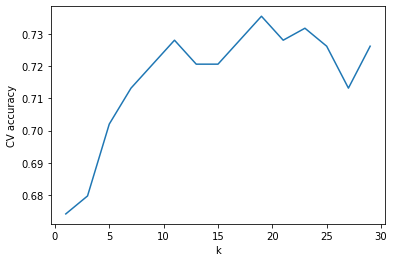

The best k value is =  19


In [13]:
cv_k_scores=[]
for k in k_values:
    kNN=KNeighborsClassifier(n_neighbors=k)
    
    # k-NN withouth cross-validation --> INCORRECT so we put argument cv the number of desired splits
    
    scores= cross_val_score(kNN, X_train, Y_train, cv=3, scoring='accuracy')
    print('K value = ', k,'Score',scores)
    cv_k_scores.append(scores.mean())
    
plt.plot(k_values, cv_k_scores)
plt.xlabel('k')
plt.ylabel('CV accuracy')
plt.show()

# Select the maximum because we are considering accuracuy
print('The best k value is = ',np.array(k_values)[cv_k_scores.index(np.array(cv_k_scores).max())])

## With max-min scale norm

K value =  1 Score [0.64804469 0.64804469 0.69832402]
K value =  3 Score [0.69273743 0.68156425 0.75418994]
K value =  5 Score [0.70949721 0.72067039 0.76536313]
K value =  7 Score [0.72067039 0.74301676 0.80446927]
K value =  9 Score [0.70949721 0.76536313 0.7877095 ]
K value =  11 Score [0.70949721 0.78212291 0.78212291]
K value =  13 Score [0.7150838  0.79329609 0.7877095 ]
K value =  15 Score [0.69273743 0.7877095  0.77653631]
K value =  17 Score [0.68715084 0.7877095  0.78212291]
K value =  19 Score [0.69832402 0.77094972 0.7877095 ]
K value =  21 Score [0.69832402 0.75418994 0.75977654]
K value =  23 Score [0.70949721 0.78212291 0.76536313]
K value =  25 Score [0.70391061 0.77653631 0.77094972]
K value =  27 Score [0.70949721 0.78212291 0.77094972]
K value =  29 Score [0.7150838  0.77653631 0.77653631]


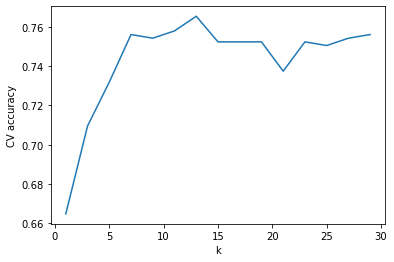

The best k value is =  13


In [14]:
cv_k_scores_scale=[]
for k in k_values:
    kNN=KNeighborsClassifier(n_neighbors=k)
    scores= cross_val_score(kNN, X_train_norm_scaler, Y_train, cv=3, scoring='accuracy')
    print('K value = ', k,'Score',scores)
    cv_k_scores_scale.append(scores.mean())
    
plt.plot(k_values, cv_k_scores_scale)
plt.xlabel('k')
plt.ylabel('CV accuracy')
plt.show()
print('The best k value is = ',np.array(k_values)[cv_k_scores_scale.index(np.array(cv_k_scores_scale).max())])

## Std scale norm

K value =  1 Score [0.66480447 0.65921788 0.68715084]
K value =  3 Score [0.69832402 0.7150838  0.72625698]
K value =  5 Score [0.70391061 0.74860335 0.77653631]
K value =  7 Score [0.70949721 0.77653631 0.77094972]
K value =  9 Score [0.72625698 0.78212291 0.76536313]
K value =  11 Score [0.72625698 0.78212291 0.78212291]
K value =  13 Score [0.73184358 0.79329609 0.79888268]
K value =  15 Score [0.70391061 0.78212291 0.7877095 ]
K value =  17 Score [0.68156425 0.78212291 0.80446927]
K value =  19 Score [0.69273743 0.77653631 0.7877095 ]
K value =  21 Score [0.7150838  0.77094972 0.77653631]
K value =  23 Score [0.70949721 0.77653631 0.78212291]
K value =  25 Score [0.72067039 0.7877095  0.77653631]
K value =  27 Score [0.72625698 0.79888268 0.77094972]
K value =  29 Score [0.72625698 0.77653631 0.78212291]


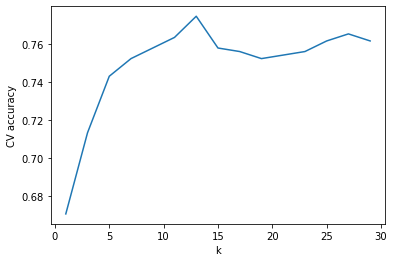

The best k value is =  13


In [15]:
cv_k_scores_std_scale=[]
for k in k_values:
    kNN=KNeighborsClassifier(n_neighbors=k)
    scores= cross_val_score(kNN, X_train_norm_std_scaler, Y_train, cv=3, scoring='accuracy')
    print('K value = ', k,'Score',scores)
    cv_k_scores_std_scale.append(scores.mean())
    
plt.plot(k_values, cv_k_scores_std_scale)
plt.xlabel('k')
plt.ylabel('CV accuracy')
plt.show()
print('The best k value is = ', np.array(k_values)[cv_k_scores_std_scale.index(np.array(cv_k_scores_std_scale).max())])

·

·

·

# No norm

In [16]:
kNN=KNeighborsClassifier(n_neighbors=np.array(k_values)[cv_k_scores.index(np.array(cv_k_scores).max())])
model=kNN.fit(X_train,Y_train) 

In [17]:
y_pred=model.predict(X_test)

In [18]:
print(accuracy_score(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))

0.7662337662337663
[[132  23]
 [ 31  45]]


#  With max-min scale norm and std_scale norm

In [19]:
kNN=KNeighborsClassifier(n_neighbors=np.array(k_values)[cv_k_scores_scale.index(np.array(cv_k_scores_scale).max())])
model=kNN.fit(X_train_norm_scaler,Y_train) 
y_pred=model.predict(X_test_norm_scaler)
print('Max-min norm')
print(accuracy_score(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))

Max-min norm
0.7142857142857143
[[124  31]
 [ 35  41]]


In [20]:
kNN=KNeighborsClassifier(n_neighbors=
                         np.array(k_values)[cv_k_scores_std_scale.index(np.array(cv_k_scores_std_scale).max())])
model=kNN.fit(X_train_norm_std_scaler,Y_train) 
y_pred=model.predict(X_test_norm_std_scaler)
print('Std norm')
print(accuracy_score(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))

Std norm
0.7359307359307359
[[127  28]
 [ 33  43]]


## Other tool for C.V

# No norm

In [21]:
# GridSearchCV
param_grid = {'n_neighbors': k_values}
# k-NN
kNN_model=KNeighborsClassifier()
#use gridsearch to test all values
grid = GridSearchCV(kNN_model, param_grid, cv = 3, scoring = 'accuracy')
grid.fit(X_train,Y_train)
print(grid.best_params_)

{'n_neighbors': 19}


In [22]:
my_model = grid.best_estimator_
my_model.fit(X_train, Y_train)
y_predicted = my_model.predict(X_test)
print(accuracy_score(Y_test, y_predicted))
print(confusion_matrix(Y_test, y_predicted))

0.7662337662337663
[[132  23]
 [ 31  45]]


C:\Users\riul0\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass param_name=n_neighbors, param_range=range(1, 31, 2) as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


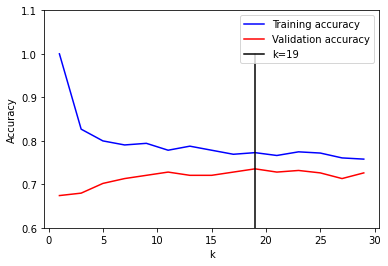

In [23]:
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.model_selection import validation_curve, GridSearchCV
train_score, val_score = validation_curve(KNeighborsClassifier(), X_train, Y_train,
                                          'n_neighbors', k_values, cv=3)



plt.plot(k_values, np.mean(train_score, 1), color='blue', label='Training accuracy')
plt.plot(k_values, np.mean(val_score, 1), color='red', label='Validation accuracy')

y_opt_k = np.linspace(0.5,1,20)
plt.plot(np.zeros_like(y_opt_k)+19, y_opt_k, color='black', label = 'k=19')

plt.legend(loc='best')
plt.ylim(0.6, 1.1)
plt.xlabel('k')
plt.ylabel('Accuracy');

# Max-min scale norm

{'n_neighbors': 13}
0.7142857142857143
[[124  31]
 [ 35  41]]


C:\Users\riul0\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass param_name=n_neighbors, param_range=range(1, 31, 2) as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


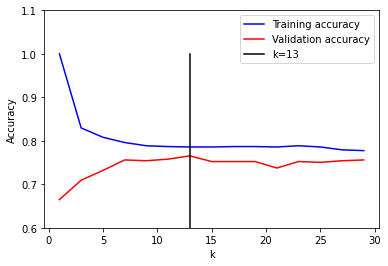

In [24]:
# GridSearchCV
param_grid = {'n_neighbors': k_values}
# k-NN
kNN_model=KNeighborsClassifier()
#use gridsearch to test all values
grid = GridSearchCV(kNN_model, param_grid, cv = 3, scoring = 'accuracy')
grid.fit(X_train_norm_scaler,Y_train)
print(grid.best_params_)

my_model = grid.best_estimator_
my_model.fit(X_train_norm_scaler, Y_train)
y_predicted = my_model.predict(X_test_norm_scaler)
print(accuracy_score(Y_test, y_predicted))
print(confusion_matrix(Y_test, y_predicted))


train_score, val_score = validation_curve(KNeighborsClassifier(), X_train_norm_scaler, Y_train,
                                          'n_neighbors', k_values, cv=3)




plt.plot(k_values, np.mean(train_score, 1), color='blue', label='Training accuracy')
plt.plot(k_values, np.mean(val_score, 1), color='red', label='Validation accuracy')

y_opt_k = np.linspace(0.5,1,20)
plt.plot(np.zeros_like(y_opt_k)+13, y_opt_k, color='black', label = 'k=13')

plt.legend(loc='best')
plt.ylim(0.6, 1.1)
plt.xlabel('k')
plt.ylabel('Accuracy');

# Std norm

{'n_neighbors': 13}
0.7359307359307359
[[127  28]
 [ 33  43]]


C:\Users\riul0\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass param_name=n_neighbors, param_range=range(1, 31, 2) as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


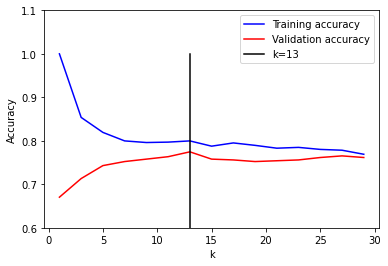

In [25]:
# GridSearchCV
param_grid = {'n_neighbors': k_values}
# k-NN
kNN_model=KNeighborsClassifier()
#use gridsearch to test all values
grid = GridSearchCV(kNN_model, param_grid, cv = 3, scoring = 'accuracy')
grid.fit(X_train_norm_std_scaler,Y_train)
print(grid.best_params_)

my_model = grid.best_estimator_
my_model.fit(X_train_norm_std_scaler, Y_train)
y_predicted = my_model.predict(X_test_norm_std_scaler)
print(accuracy_score(Y_test, y_predicted))
print(confusion_matrix(Y_test, y_predicted))


train_score, val_score = validation_curve(KNeighborsClassifier(), X_train_norm_std_scaler, Y_train,
                                          'n_neighbors', k_values, cv=3)




plt.plot(k_values, np.mean(train_score, 1), color='blue', label='Training accuracy')
plt.plot(k_values, np.mean(val_score, 1), color='red', label='Validation accuracy')

y_opt_k = np.linspace(0.5,1,20)
plt.plot(np.zeros_like(y_opt_k)+13, y_opt_k, color='black', label = 'k=13')


plt.legend(loc='best')
plt.ylim(0.6, 1.1)
plt.xlabel('k')
plt.ylabel('Accuracy');

·

·

·

# Decision Trees

Design a decision tree based classifier using the training and test subsets described above.

Include the confusion matrix as well as the results obtained based on two evaluation measures considered.


## Standard for three examples

In [21]:
# Free parameters
max_depth = np.arange(3, 15)
min_samples_leaf = [50, 100, 200]

·

In [22]:
# GridSearchCV
param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15), 'min_samples_leaf' : [50, 100, 200]}

# decision tree model
dtree_model=tree.DecisionTreeClassifier()

#use gridsearch to test all values
dtree_model = GridSearchCV(dtree_model, param_grid, cv=5) # Cross validation of 5

#fit model to data
dtree_model=dtree_model.fit(X_train, Y_train)
print(dtree_model.best_params_)

{'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 50}


# No norm

In [23]:
# Train de model
my_model = dtree_model.best_estimator_
my_tree=my_model.fit(X_train, Y_train)

#Predict using X_test
y_predicted = my_model.predict(X_test)

# Results
print('Accuracy = ' , accuracy_score(Y_test, y_predicted))
print('')

def measures_from_conf_matrix(confusion_matrix):
    TP = confusion_matrix[0][0]
    FN = confusion_matrix[0][1]
    FP = confusion_matrix[1][0]
    TN = confusion_matrix[1][1]

    sensitivity = TP/(TP+FN)
    print('Sensitivity = ',sensitivity)
    specifity = TN/(TN+FP)
    print('Specifity = ',specifity)
    return 

measures_from_conf_matrix(confusion_matrix(Y_test, y_predicted))

print('')
print(confusion_matrix(Y_test, y_predicted))


Accuracy =  0.7662337662337663

Sensitivity =  0.8129032258064516
Specifity =  0.6710526315789473

[[126  29]
 [ 25  51]]


In [24]:
my_tree.get_depth()

4

In [25]:
my_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 50,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

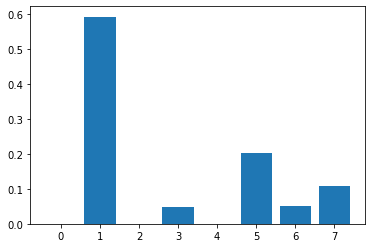

'Pregnancies'

In [26]:
x = 0
from matplotlib import pyplot
importance=my_tree.feature_importances_
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()
X_train.columns[x]

In [27]:
print(X_train.columns[[1,3,5,6,7]])

Index(['Glucose', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype='object')


In [28]:
#pip install pydotplus

In [29]:
import graphviz
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  
from six import StringIO
from IPython.display import Image  
import pydotplus

C:\Users\riul0\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass param_name=max_depth, param_range=[ 3  4  5  6  7  8  9 10 11 12 13 14] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


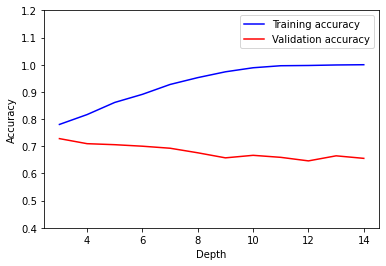

In [30]:
from sklearn.model_selection import learning_curve, GridSearchCV
#from sklearn.learning_curve import validation_curve
from sklearn.model_selection import validation_curve, GridSearchCV
train_score, val_score = validation_curve(tree.DecisionTreeClassifier(), X_train, Y_train,
                                          'max_depth', max_depth, cv=3)

plt.plot(max_depth, np.mean(train_score, 1), color='blue', label='Training accuracy')
plt.plot(max_depth, np.mean(val_score, 1), color='red', label='Validation accuracy')
plt.legend(loc='best')
plt.ylim(0.4, 1.2)
plt.xlabel('Depth')
plt.ylabel('Accuracy');

In [31]:
#pip install graphviz
#conda install graphviz

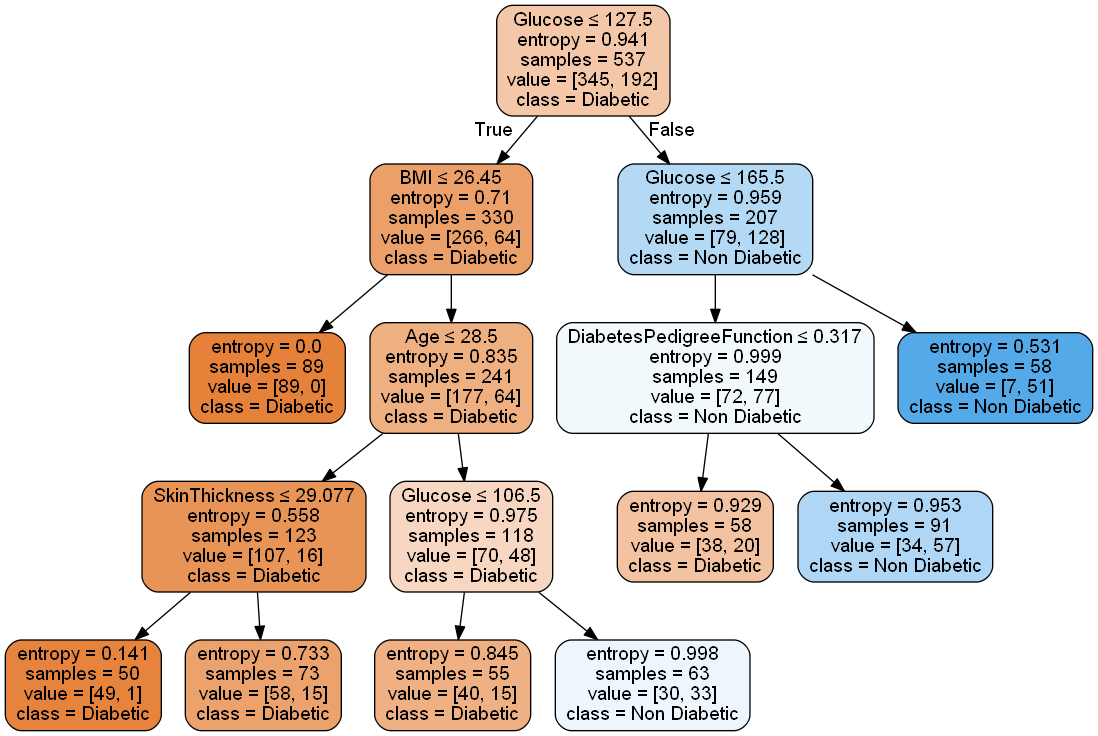

In [32]:
dot_data = StringIO()
export_graphviz(my_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = db.columns[0:-1],class_names=['Diabetic','Non Diabetic'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes_no_norm.png')
Image(graph.create_png())

·

·

# Max-min scale

In [33]:
param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15), 'min_samples_leaf' : [50, 100, 200]}
dtree_model=tree.DecisionTreeClassifier()
dtree_model = GridSearchCV(dtree_model, param_grid, cv=5) # Cross validation of 5
dtree_model=dtree_model.fit(X_train_norm_scaler, Y_train)
print(dtree_model.best_params_)


# Train de model
my_model = dtree_model.best_estimator_
my_tree=my_model.fit(X_train_norm_scaler, Y_train)
#Predict using X_test
y_predicted = my_model.predict(X_test_norm_scaler)
# Results
print('Accuracy = ' , accuracy_score(Y_test, y_predicted))
print('')
measures_from_conf_matrix(confusion_matrix(Y_test, y_predicted))

print('')
print(confusion_matrix(Y_test, y_predicted))
my_tree.get_depth()

{'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 50}
Accuracy =  0.7186147186147186

Sensitivity =  0.7290322580645161
Specifity =  0.6973684210526315

[[113  42]
 [ 23  53]]


4

In [34]:
my_tree.get_params() 

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 50,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

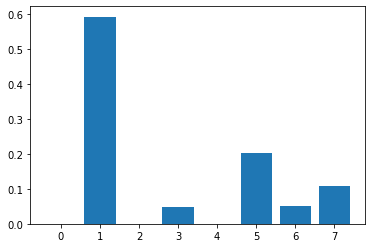

In [35]:
importance=my_tree.feature_importances_
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [36]:
print(X_train.columns[[1,3,5,6,7]])

Index(['Glucose', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype='object')


C:\Users\riul0\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass param_name=max_depth, param_range=[ 3  4  5  6  7  8  9 10 11 12 13 14] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


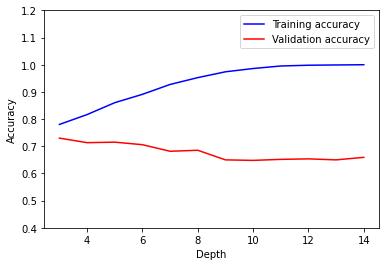

In [37]:
train_score, val_score = validation_curve(tree.DecisionTreeClassifier(), X_train_norm_scaler, Y_train,
                                          'max_depth', max_depth, cv=3)

plt.plot(max_depth, np.mean(train_score, 1), color='blue', label='Training accuracy')
plt.plot(max_depth, np.mean(val_score, 1), color='red', label='Validation accuracy')
plt.legend(loc='best')
plt.ylim(0.4, 1.2)
plt.xlabel('Depth')
plt.ylabel('Accuracy');

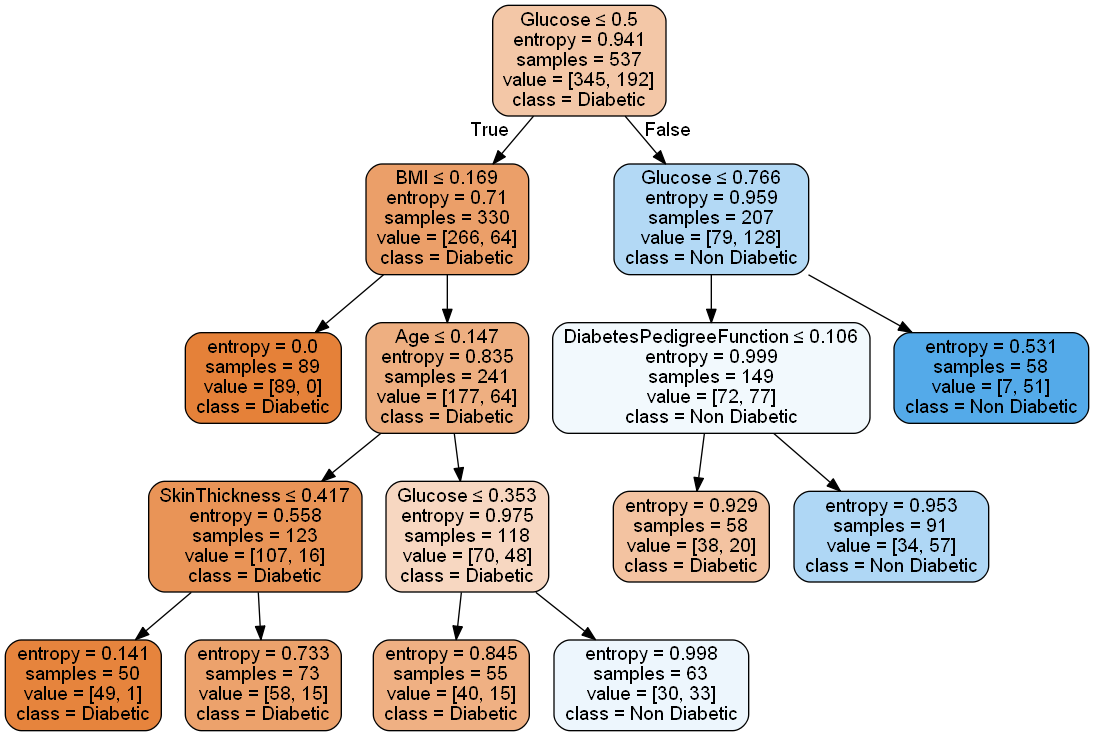

In [38]:
dot_data = StringIO()
export_graphviz(my_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = db.columns[0:-1],class_names=['Diabetic','Non Diabetic'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes_max-min_norm.png')
Image(graph.create_png())

# Std norm

In [39]:
param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15), 'min_samples_leaf' : [50, 100, 200]}
dtree_model=tree.DecisionTreeClassifier()
dtree_model = GridSearchCV(dtree_model, param_grid, cv=5) # Cross validation of 5
dtree_model=dtree_model.fit(X_train_norm_std_scaler, Y_train)
print(dtree_model.best_params_)


# Train de model
my_model = dtree_model.best_estimator_
my_tree=my_model.fit(X_train_norm_std_scaler, Y_train)
#Predict using X_test
y_predicted = my_model.predict(X_test_norm_std_scaler)

# Results
print('Accuracy = ' , accuracy_score(Y_test, y_predicted))
print('')

measures_from_conf_matrix(confusion_matrix(Y_test, y_predicted))

print('')
print(confusion_matrix(Y_test, y_predicted))

my_tree.get_depth()

{'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 50}
Accuracy =  0.7532467532467533

Sensitivity =  0.7677419354838709
Specifity =  0.7236842105263158

[[119  36]
 [ 21  55]]


4

In [40]:
my_tree.get_params() 

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 50,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

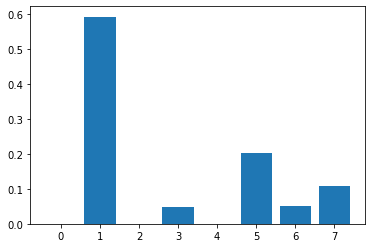

In [41]:
importance=my_tree.feature_importances_
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [42]:
print(X_train.columns[[1,3,5,6,7]])

Index(['Glucose', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype='object')


C:\Users\riul0\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass param_name=max_depth, param_range=[ 3  4  5  6  7  8  9 10 11 12 13 14] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


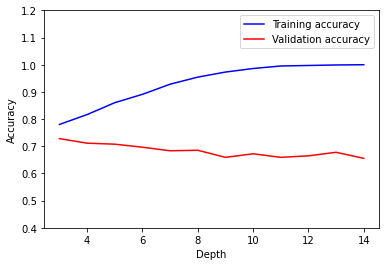

In [43]:
train_score, val_score = validation_curve(tree.DecisionTreeClassifier(), X_train_norm_std_scaler, Y_train,
                                          'max_depth', max_depth, cv=3)

plt.plot(max_depth, np.mean(train_score, 1), color='blue', label='Training accuracy')
plt.plot(max_depth, np.mean(val_score, 1), color='red', label='Validation accuracy')
plt.legend(loc='best')
plt.ylim(0.4, 1.2)
plt.xlabel('Depth')
plt.ylabel('Accuracy');

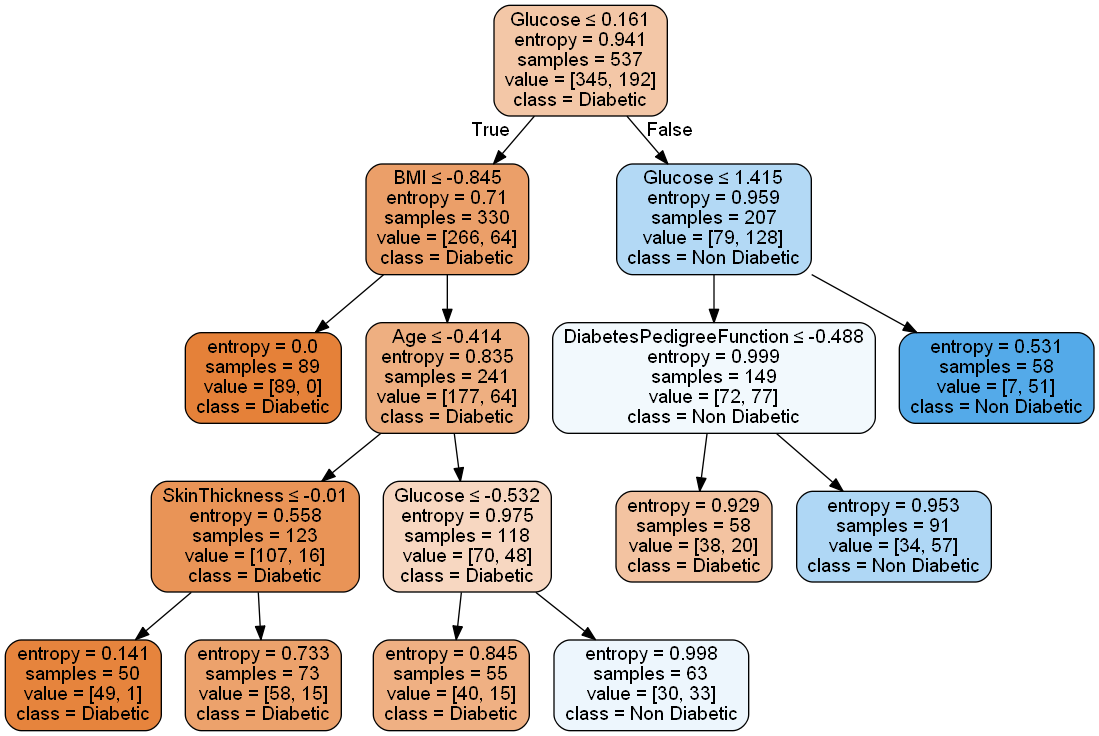

In [44]:
dot_data = StringIO()
export_graphviz(my_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = db.columns[0:-1],class_names=['Diabetic','Non Diabetic'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes_std_norm.png')
Image(graph.create_png())

·

# Neural Networks: Multi-layer Perceptron 

## No norm

In [45]:
from sklearn.neural_network import MLPClassifier

# MLP is sensitive to feature scaling.

# Starting from initial random weights, multi-layer perceptron (MLP) minimizes the loss function by 
# repeatedly updating these weights. After computing the loss, a backward pass propagates it from 
# the output layer to the previous layers, providing each weight parameter with an update value meant to decrease the loss.

activation_functs = ['identity', 'logistic', 'tanh', 'relu']
learning_rates = [0.001, 0.005, 0.01, 0.05, 0.1]

# The number of hidden nodes should be less than twice the size of the nodes in the input layer.
# The number of hidden nodes should be 2/3 the size of input nodes, plus the size of the output node.

for i in activation_functs:
    for j in learning_rates:

        MLP = MLPClassifier(hidden_layer_sizes =(8,), activation = i, solver = 'sgd', random_state = 1, 
                        learning_rate_init = j , shuffle = True ,max_iter = 400, validation_fraction = 0.3)

        MLP = MLP.fit(X_train, Y_train)
        print('Activation function = ',i,', Learning rate = ', j , 'Score = ',MLP.score(X_test, Y_test))

Activation function =  identity , Learning rate =  0.001 Score =  0.670995670995671
Activation function =  identity , Learning rate =  0.005 Score =  0.6883116883116883
Activation function =  identity , Learning rate =  0.01 Score =  0.329004329004329
Activation function =  identity , Learning rate =  0.05 Score =  0.329004329004329
Activation function =  identity , Learning rate =  0.1 Score =  0.670995670995671
Activation function =  logistic , Learning rate =  0.001 Score =  0.670995670995671
Activation function =  logistic , Learning rate =  0.005 Score =  0.7142857142857143
Activation function =  logistic , Learning rate =  0.01 Score =  0.6926406926406926
Activation function =  logistic , Learning rate =  0.05 Score =  0.6233766233766234
Activation function =  logistic , Learning rate =  0.1 Score =  0.670995670995671
Activation function =  tanh , Learning rate =  0.001 Score =  0.6666666666666666
Activation function =  tanh , Learning rate =  0.005 Score =  0.670995670995671
Act

In [46]:
print('Best result = Activation function =  logistic , Learning rate =  0.005 Score =  0.7142857142857143')

Best result = Activation function =  logistic , Learning rate =  0.005 Score =  0.7142857142857143


In [47]:
MLP = MLPClassifier(hidden_layer_sizes =(8,), activation = 'logistic', solver = 'sgd', random_state = 1, 
                        learning_rate_init = 0.005 , shuffle = True ,max_iter = 400, validation_fraction = 0.3)

MLP = MLP.fit(X_train, Y_train)
print('Score = ',MLP.score(X_test, Y_test))

Score =  0.7142857142857143


# Max-min norm

In [48]:
# MLP is sensitive to feature scaling.

activation_functs = ['identity', 'logistic', 'tanh', 'relu']
learning_rates = [0.001, 0.005, 0.01, 0.05, 0.1]

for i in activation_functs:
    for j in learning_rates:

        MLP = MLPClassifier(hidden_layer_sizes =(8,), activation = i, solver = 'sgd', random_state = 1, 
                        learning_rate_init = j , shuffle = True ,max_iter = 400, validation_fraction = 0.3)

        MLP = MLP.fit(X_train_norm_scaler, Y_train)
        print('Activation function = ',i,', Learning rate = ', j , 'Score = ',
              MLP.score(X_test_norm_scaler, Y_test))

C:\Users\riul0\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation function =  identity , Learning rate =  0.001 Score =  0.670995670995671
Activation function =  identity , Learning rate =  0.005 Score =  0.7445887445887446
Activation function =  identity , Learning rate =  0.01 Score =  0.7532467532467533
Activation function =  identity , Learning rate =  0.05 Score =  0.7532467532467533
Activation function =  identity , Learning rate =  0.1 Score =  0.7489177489177489
Activation function =  logistic , Learning rate =  0.001 Score =  0.670995670995671
Activation function =  logistic , Learning rate =  0.005 Score =  0.670995670995671


C:\Users\riul0\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation function =  logistic , Learning rate =  0.01 Score =  0.6753246753246753
Activation function =  logistic , Learning rate =  0.05 Score =  0.7489177489177489
Activation function =  logistic , Learning rate =  0.1 Score =  0.7532467532467533


C:\Users\riul0\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation function =  tanh , Learning rate =  0.001 Score =  0.6753246753246753


C:\Users\riul0\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation function =  tanh , Learning rate =  0.005 Score =  0.7402597402597403
Activation function =  tanh , Learning rate =  0.01 Score =  0.7445887445887446


C:\Users\riul0\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation function =  tanh , Learning rate =  0.05 Score =  0.7575757575757576
Activation function =  tanh , Learning rate =  0.1 Score =  0.7532467532467533
Activation function =  relu , Learning rate =  0.001 Score =  0.670995670995671


C:\Users\riul0\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation function =  relu , Learning rate =  0.005 Score =  0.7575757575757576
Activation function =  relu , Learning rate =  0.01 Score =  0.7748917748917749
Activation function =  relu , Learning rate =  0.05 Score =  0.7575757575757576
Activation function =  relu , Learning rate =  0.1 Score =  0.7662337662337663


In [49]:
print('Best result = Activation function =  relu , Learning rate =  0.01 Score =  0.7748917748917749')

Best result = Activation function =  relu , Learning rate =  0.01 Score =  0.7748917748917749


In [50]:
MLP = MLPClassifier(hidden_layer_sizes =(8,), activation = 'relu', solver = 'sgd', random_state = 1, 
                        learning_rate_init = 0.01 , shuffle = True ,max_iter = 400, validation_fraction = 0.3)

MLP = MLP.fit(X_train_norm_scaler, Y_train)
print('Score = ',MLP.score(X_test_norm_scaler, Y_test))

Score =  0.7748917748917749


# Std norm

In [51]:
# MLP is sensitive to feature scaling.

activation_functs = ['identity', 'logistic', 'tanh', 'relu']
learning_rates = [0.001, 0.005, 0.01, 0.05, 0.1]

for i in activation_functs:
    for j in learning_rates:

        MLP = MLPClassifier(hidden_layer_sizes =(8,), activation = i, solver = 'sgd', random_state = 1, 
                        learning_rate_init = j , shuffle = True ,max_iter = 400, validation_fraction = 0.3)

        MLP = MLP.fit(X_train_norm_std_scaler, Y_train)
        print('Activation function = ',i,', Learning rate = ', j , 'Score = ',
              MLP.score(X_test_norm_std_scaler, Y_test))

Activation function =  identity , Learning rate =  0.001 Score =  0.7489177489177489
Activation function =  identity , Learning rate =  0.005 Score =  0.7619047619047619
Activation function =  identity , Learning rate =  0.01 Score =  0.7532467532467533
Activation function =  identity , Learning rate =  0.05 Score =  0.7532467532467533
Activation function =  identity , Learning rate =  0.1 Score =  0.7619047619047619


C:\Users\riul0\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation function =  logistic , Learning rate =  0.001 Score =  0.6796536796536796
Activation function =  logistic , Learning rate =  0.005 Score =  0.7532467532467533
Activation function =  logistic , Learning rate =  0.01 Score =  0.7575757575757576


C:\Users\riul0\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation function =  logistic , Learning rate =  0.05 Score =  0.7575757575757576


C:\Users\riul0\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation function =  logistic , Learning rate =  0.1 Score =  0.7662337662337663
Activation function =  tanh , Learning rate =  0.001 Score =  0.7316017316017316
Activation function =  tanh , Learning rate =  0.005 Score =  0.7662337662337663


C:\Users\riul0\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation function =  tanh , Learning rate =  0.01 Score =  0.7575757575757576


C:\Users\riul0\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation function =  tanh , Learning rate =  0.05 Score =  0.7272727272727273


C:\Users\riul0\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation function =  tanh , Learning rate =  0.1 Score =  0.6926406926406926


C:\Users\riul0\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation function =  relu , Learning rate =  0.001 Score =  0.7402597402597403
Activation function =  relu , Learning rate =  0.005 Score =  0.7662337662337663
Activation function =  relu , Learning rate =  0.01 Score =  0.7748917748917749
Activation function =  relu , Learning rate =  0.05 Score =  0.7532467532467533
Activation function =  relu , Learning rate =  0.1 Score =  0.7575757575757576


In [52]:
print('Best result = Activation function =  relu , Learning rate =  0.01 Score =  0.7748917748917749')

Best result = Activation function =  relu , Learning rate =  0.01 Score =  0.7748917748917749


In [53]:
MLP = MLPClassifier(hidden_layer_sizes =(8,), activation = 'relu', solver = 'sgd', random_state = 1, 
                        learning_rate_init = 0.01 , shuffle = True ,max_iter = 400, validation_fraction = 0.3)

MLP = MLP.fit(X_train_norm_std_scaler, Y_train)
print('Score = ',MLP.score(X_test_norm_std_scaler, Y_test))

Score =  0.7748917748917749


·

·

·

# ASSIGNMENTS LAB 3

· 

## K-NN



Justify the type of normalization considered and explain how it is done on each subset (training, validation and test). Indicate if the performance obtained in the test set changes after normalizing the variables.

Reasonably explain the relationship between the capacity of generalization and the value of k. Include the obtained curves for an evaluation measure considered both for the train set and for the validation set as a function of the k parameter. Briefly comment on them.

Answers  

- The two normalizations considered in order to apply it to the training set are the max-min scale and the standard scaler from the preprocessing tool. We dont perform this to the test set because it is a binary variable, so there is no need to reshape the range of its values so that the algorithm is not affected by its dynamic range.

The max-min normalization does the scale of each feature individually in a range from zero to one.

The Standard normalization differs from the previous one by equalizing the mean to zero and rescaling the variance to one.

- After applying the code to the whole dataset before and after normalizing, we are able to see how improves the accuracy level when we are focused on the train sets, but lowers it in the test scenario. The aim of changing the range of the variables is to set the algorithm in a scenario where it is not affected by the different scales or dynamic range from each one. But looking the test results, we conclude the presence of an overfitting boundary in max-min and std normalizations.

- When performing k-nn methods, we have to take into account the k value. So that, we dont choose low values that overfit our algorithm by complex boundaries to the dataset, and neither too high values, in order to avoid the underfitting. In this examples, k = 19 or 13 permits to the algorithm performs the best generalization possible. 

- In the last part of this section we can see the three graphs, representing the variance in depth of the accuracy of the model on the train and validation set. The corresponding k optimal value would be the one that is present on the depth axis, where the two lines are closer. This means a balance between the two accuracies.

·

## Decision Trees

Indicate if the performance obtained in the test set changes after normalizing the variables.

In terms of under- and over-fitting, explain which is more likely to occur if the maximum number of cases per tree node is very small.

Indicate which of the parameters explained in theory you have analyzed to achieve that the designed model has generalization capacity. Include the obtained curves for an evaluation measure considered both for the train set and for the validation set as a function of the selected parameter. Comment them briefly.

Answers

- Normalizing in decision trees does not affect the final result because we evaluate each of the variable iteratively and more importantly, we evaluate it independently 
- With respect to the number of cases per node in the tree decision scheme, if we have a very low number, we would obtain a simpler final model, consequently obtaining an under-fitting model. Otherwise, with a high number of cases per node, we may obtain a too complex model, in other words, we would obtain an over-fitting model.
- As it has been theoretically explained in class, in this case we have used the cross validation criteria and the measure of purity (both gini index and entropy gain criteria).
- After having plotted the curves to evaluate the measure of both training and validation sets, we can figure out that as the depth does get bigger, the training set will have an increasing accuracy (overfitting) and the validation set will have a decreasing accuracy (underfitting).

·

## Multilayer perceptron

Designed a Multilayer Perceptron (MLP) with a single hidden layer, random initialization of the neural network weights and  back- propagation training algorithm. Reasonably justify:

a) The number of neurons in the input layer.

b) The number of neurons in the output layer.

c) The activation functions considered.

d) The value of the learning rate used.

e) The cost function to be optimized.



Explain briefly and concise way what an epoch is, exemplifying with your particular case.

Reasonably justify the choice of a architecture that provides good performance in the test set.

Answers

a) The number of neurons in the input layer will the number of variables we have in the x train set, specifically being 8 variables in total ( 8 neurons)

b) The number of neurons in the output layer is going to be one, which will showing the value of the corresponding output in order to classify binary, in group 0 or 1.

c) The activation functions that have been considered are the ones that are already pre-determined by the MLPClassifier function. Specifically, we have 4 different and possible activation functions, being the following ones: 

- I) Identity function (that actually return us f(x) = x
- II) Logistic function (sigmoid function)
- III) Tangent function (hyperbolic function)
- IV) Rectified linear unit function (returning f(x) = max(0,x))

d) In our case, the value of the learning rate is going to be determined by an evaluation criteria with respect some points of interest (such as the cost function or error). This value will be in the range of {0.001,0.1}. 

e) The cost function that is going to be optimized will be the Log loss function called Cross-Entropy which is the one that we have learned from class when we approach a problem of binary classification. 

- Explain briefly and concise way what an epoch is, exemplifying with your particular case : 

    - An epoch is the number of times the algorithm is going to work through the whole training set. For stochastic solvers (‘sgd’, ‘adam’), this determines the number of epochs, not the number of gradient steps. In pur example, is set in 'auto', which implies = batch_size = min(200, n_samples = 537 at training set and 231 at test). In addition, the max number of iterations will take this number of batches 400 times



- Reasonably justify the choice of a architecture that provides good performance in the test set.
    - As first step, we have to take into account the sensitivity of the MLP to scale inputs. So we apply either max-min normalization or standarization, and then we apply some code with the aim of finding out the best parameters for the classifier. 
    - In our case, we perform the previous ideas by looping iteratively elements that correspond to lists which are compound of different types of activation functions and possible learning rates in a MLP scenario. Some other parameters as the percentage of validation set, shape of the individual hidden layer and so on are predetermined. This is explained because we thought that this values will be the ideal ones to resolve this problem, so there is no need of looking for the best.
    


Some useful links:

    https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
    
    https://scikit-learn.org/stable/modules/neural_networks_supervised.html

## Benchmark results


In view of the results obtained to solve the proposed classification task, briefly justify which model you consider most appropriate.

Looking to the values of accuracy that we get from each model after fitting them to the X_test and Y_Test (Including normalized ones), we find out that the best model performing the classification task is the neural network, more precisely the Multilayer Perceptron